In [1]:
#!/usr/bin/python
from turtle import color
import pandas as pd
import numpy as np
import sys
import logging
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import itertools
import os
import scipy.io
from statannotations.Annotator import Annotator
sys.path.append('/Users/yilewang/workspaces/Metaconnectivity/Python')
from TS2dFCstream import TS2dFCstream
from dFCstream2Trimers import dFCstream2Trimers
from dFCstream2MC import dFCstream2MC
"""
@Author: Yile Wang

This script is used to calculate the homotopic meta-connectivity in four groups, SNC, NC, MCI, AD
"""

# brain region labels for your reference
regions = ['aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R']
regionswithgroups = ['groups','aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R']
regions_id_withgroups = ['groups','caseid','aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R']
group = ['SNC', 'NC', 'MCI','AD']
regionsHalf = np.array(['aCNG', 'mCNG','pCNG','HIP','PHG','AMY','sTEMp', 'mTEMp'])
colors = ["#66CDAA","#4682B4","#AB63FA","#FFA15A"]

/var/folders/3n/xjq3mj2x4fg20l17q5mydc1c0000gn/T/ipykernel_28412/2992795131.py:9: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
import numpy as np
from scipy.signal import welch

def calculate_dominant_frequency(data, fs):
    """
    Calculate the dominant frequency of a signal using the power spectral density.

    Parameters:
    data (array): The signal data.
    fs (float): The sampling frequency of the signal.

    Returns:
    float: The dominant frequency.
    """
    # Calculate the power spectral density
    freqs, psd = welch(data, fs)

    # Find the frequency with the highest power spectral density
    dominant_frequency = freqs[np.argmax(psd)]

    return dominant_frequency

In [3]:


regions14 = []
for i in range(14):
    wt = ["regions_", str(i)]
    wt = "".join(wt)
    regions14.append(wt)

# iterate simulated functional connectivity
if __name__ == "__main__":
    table = pd.DataFrame(columns=regions_id_withgroups)
    for grp in group:
        ldir = os.listdir("/Users/yilewang/workspaces/data4project/lateralization/ts_fmri/fmri_AAL_16/"+ grp+'-TS')
        for ind, y in enumerate(ldir):
            # Here is the path of the mat file of the FC data
            pth_efc = "/Users/yilewang/workspaces/data4project/lateralization/ts_fmri/fmri_AAL_16/"+ grp+'-TS/'+ y +"/ROISignals_"+ y +".mat"
            # pth_efc = "/home/wayne/TS-4-Vik/"+grp+"-TS/"+ y +"/ROISignals_"+ y +".mat"
            ea = scipy.io.loadmat(pth_efc)
            all = ea['ROISignals']
            df = pd.DataFrame.from_dict(all)
            df.columns = regions
            do_freq = []
            for i in df.columns:
                do_freq.append(calculate_dominant_frequency(df[i], 0.5))
            table = pd.concat([table, pd.DataFrame([[grp, y] + do_freq], columns=regions_id_withgroups)], ignore_index=True)
    print(table)


   groups caseid    aCNG-L    aCNG-R    mCNG-L    mCNG-R    pCNG-L    pCNG-R  \
0     SNC  3610A  0.016827  0.016827  0.016827  0.016827  0.016827  0.016827   
1     SNC  2820A  0.045673  0.019231  0.019231  0.021635  0.016827  0.024038   
2     SNC  8709A  0.014423  0.014423  0.074519  0.024038  0.033654  0.084135   
3     SNC  3168A  0.093750  0.093750  0.055288  0.024038  0.043269  0.043269   
4     SNC  4481A  0.064904  0.057692  0.036058  0.031250  0.060096  0.031250   
..    ...    ...       ...       ...       ...       ...       ...       ...   
69     AD  0506A  0.069712  0.069712  0.069712  0.069712  0.019231  0.036058   
70     AD  7673A  0.067308  0.067308  0.031250  0.031250  0.031250  0.055288   
71     AD  5368A  0.031250  0.021635  0.048077  0.012019  0.012019  0.012019   
72     AD  4612A  0.024038  0.014423  0.060096  0.057692  0.014423  0.057692   
73     AD  1243A  0.016827  0.019231  0.069712  0.069712  0.012019  0.021635   

       HIP-L     HIP-R     PHG-L     PH

/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 208, using nperseg = 208
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 208, using nperseg = 208
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 208, using nperseg = 208
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 208, using nperseg = 208
  warnings.warn('nperseg = {0:d} is greater than input lengt

In [4]:
# average of across columns except for the first two columns
table['average'] = table.iloc[:, 2:].mean(axis=1)

Text(0.5, 0, '')

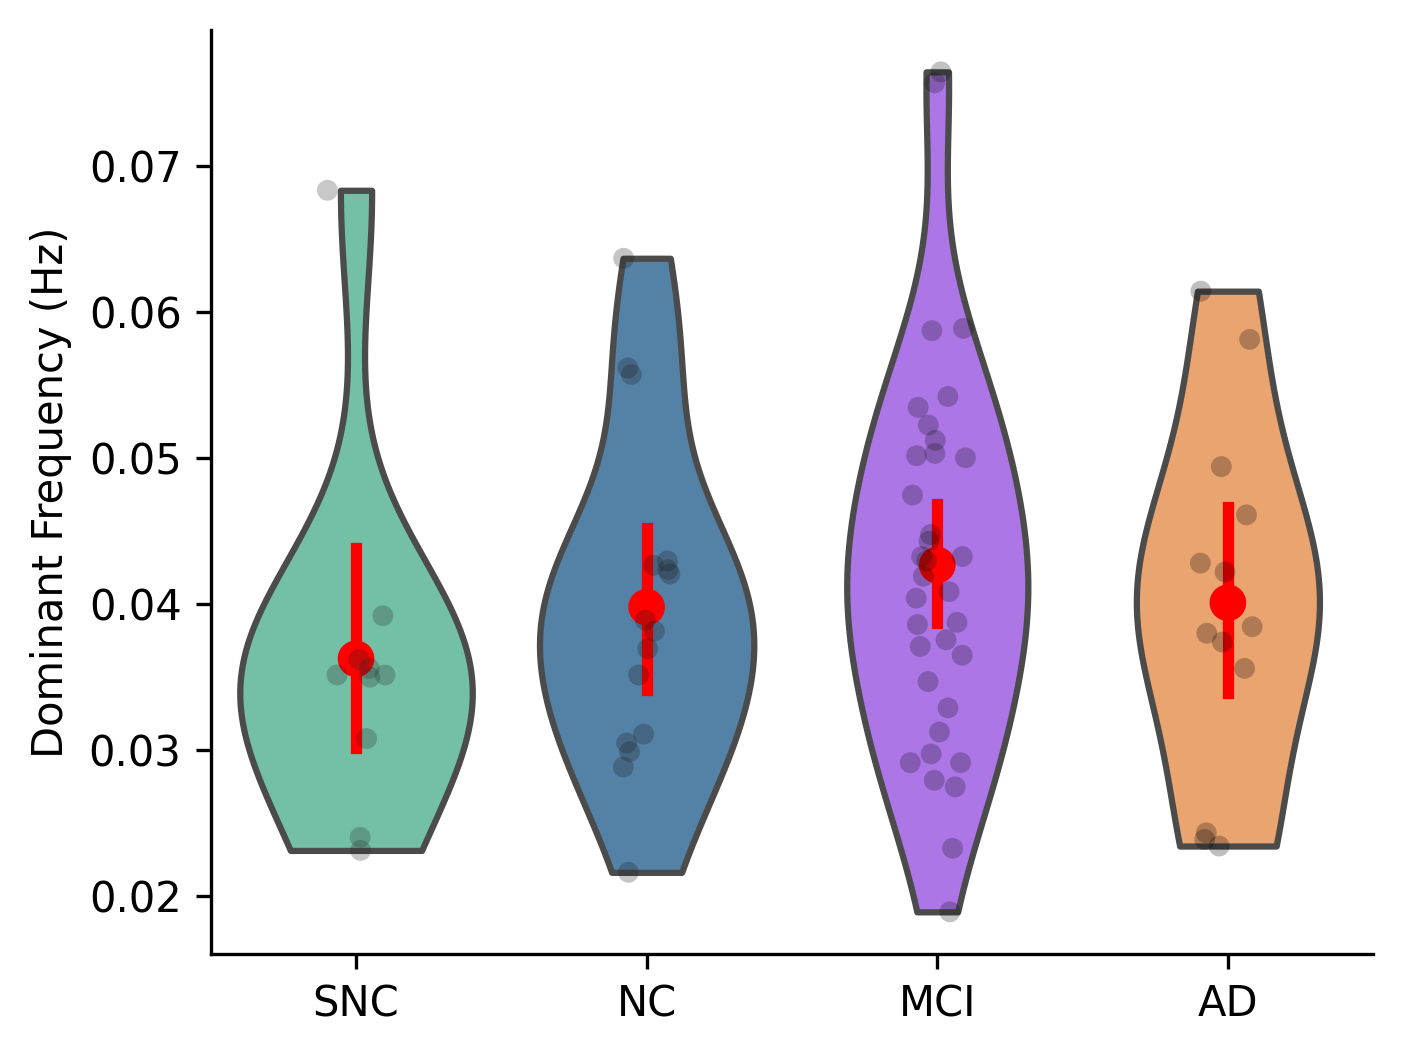

In [5]:
import seaborn as sns
# colors = ['#7F58AF','#64C5EB','#E84D8A','#FEB326']
colors = ["#66CDAA","#4682B4","#AB63FA","#FFA15A"]
figure = plt.figure(figsize=(5, 4), dpi=300)
sns.violinplot(x="groups", y="average", data=table, inner=None, cut=0, palette=colors)
sns.stripplot(x="groups", y="average",data=table, palette='dark:black', label=None, alpha=0.25)
sns.pointplot(x="groups", y="average",data=table, markers="o", color="red", errorbar=None, linestyles="None")
# plt.legend([],[], frameon=False)
# # only keep violinplot legend
# handles, labels = figure.gca().get_legend_handles_labels()
# figure.legend(handles[:2], labels[:2], loc='upper right')
# hide top and right frame
sns.despine(top=True, right=True)
plt.ylabel('Dominant Frequency (Hz)')
plt.xlabel('')

### Group level results MC Homo

In [6]:
# import mc_homo
mc_homo = pd.read_excel("/Users/yilewang/workspaces/data4project/lateralization/gc1sec_res/meta/mc_homo.xlsx")
mc_homo['avg'] = mc_homo.iloc[:, 2:].mean(axis=1)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

MCI vs. AD: Mann-Whitney-Wilcoxon test two-sided, P_val:3.917e-05 U_stat=1.880e+02
SNC vs. MCI: Mann-Whitney-Wilcoxon test two-sided, P_val:3.656e-02 U_stat=1.440e+02
NC vs. AD: Mann-Whitney-Wilcoxon test two-sided, P_val:9.252e-06 U_stat=1.950e+02
SNC vs. AD: Mann-Whitney-Wilcoxon test two-sided, P_val:7.468e-06 U_stat=1.960e+02


/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


(0.5265924500470972, 0.8049416387266798)

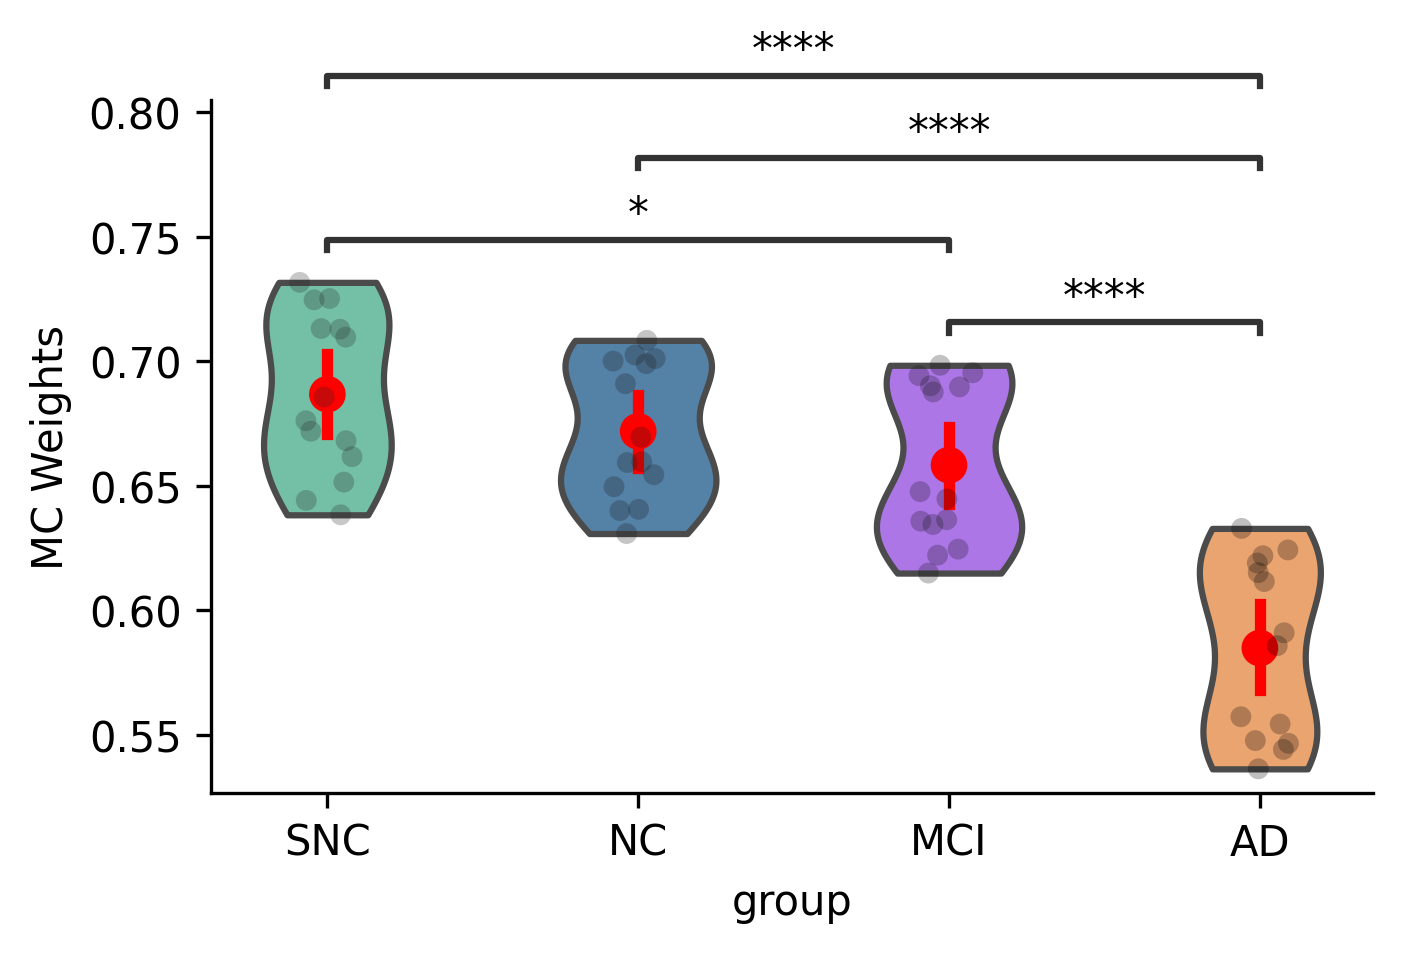

In [7]:
colors = ["#66CDAA","#4682B4","#AB63FA","#FFA15A"]
figure = plt.figure(figsize=(5,3), dpi=300)
sns.violinplot(x="group", y = "avg", data=mc_homo, inner=None, palette=colors, cut=0, width=0.5)
sns.stripplot(x="group", y = "avg", data=mc_homo, palette='dark:black', label=None, alpha=0.25)
sns.pointplot(x="group", y = "avg", data=mc_homo, markers="o", color="red", errorbar=None, linestyles="None")


annot = Annotator(figure.gca(), [
                (("SNC"), ("NC")),(("NC"), ("MCI")), (("MCI"), ("AD")), (("SNC"), ("MCI")),(("NC"),("AD")), (("SNC"),("AD"))],
                x="group",
                y='avg',
                data = mc_homo)
annot.configure(test='Mann-Whitney', text_format='star', hide_non_significant=True)
annot.apply_and_annotate()
sns.despine(top=True, right=True)

plt.ylabel("MC Weights")
sns.despine(top=True, right=True)
plt.ylim(top=max(mc_homo.avg)*1.1)  # Increase the max y limit by 10%


### Group level analyses

In [8]:
"""
@Author: Yile Wang

This script is used to calculate the homotopic meta-connectivity in four groups, SNC, NC, MCI, AD
"""

# brain region labels for your reference
regions = ['aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R']
regionswithgroups = ['groups','aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R']
group = ['SNC', 'NC', 'MCI','AD']
regionsHalf = np.array(['aCNG', 'mCNG','pCNG','HIP','PHG','AMY','sTEMp', 'mTEMp'])
zone1 = ['aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R']
zone2 = ['HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R']

regions14 = []
for i in range(14):
    wt = ["regions_", str(i)]
    wt = "".join(wt)
    regions14.append(wt)

# iterate simulated functional connectivity
if __name__ == "__main__":
    Trimer_Homo = pd.DataFrame(columns=['groups','trimer_homo','aCNG','mCNG','pCNG','HIP','PHG','AMY','sTEMp','mTEMp' ])
    Trimer_Hetero  = pd.DataFrame(columns=['groups','trimer_hetero','aCNG','mCNG','pCNG','HIP','PHG','AMY','sTEMp','mTEMp' ])
    Trimer = pd.DataFrame()
    tmp_col = ["group", "caseid"]
    tmp_col.extend(regionsHalf)
    tmp_cols = ["group", "caseid"] + regions
    
    for grp in group:
        # subject case ids
        ldir = os.listdir("/Users/yilewang/workspaces/data4project/lateralization/ts_fmri/fmri_AAL_16/"+ grp+'-TS')
        # ldir = os.listdir('/home/wayne/TS-4-Vik/'+grp+'-TS/')
        # condition1
        tmp_homo = np.array([])
        homoRegions = np.ones((1,len(regionsHalf)))
        # condition2
        tmp_hetero = np.array([])
        heteroRegions = np.ones((1, len(regions)))
        MC_all = np.zeros((16,16, 16, len(ldir)))

        for ind, y in enumerate(ldir):
            # import empirical functional connectivity
            # Here is the path of the mat file of the FC data
            pth_efc = "/Users/yilewang/workspaces/data4project/lateralization/ts_fmri/fmri_AAL_16/"+ grp+'-TS/'+ y +"/ROISignals_"+ y +".mat"
            # pth_efc = "/home/wayne/TS-4-Vik/"+grp+"-TS/"+ y +"/ROISignals_"+ y +".mat"
            ea = scipy.io.loadmat(pth_efc)
            all = ea['ROISignals']
            df = pd.DataFrame.from_dict(all)
            df.columns = regions
            # calculate the meta-connectivity, using existing script:
            dFCstream = TS2dFCstream(df.to_numpy(), 5, None, '2D') # dFCstream represents 
            # Calculate MC
            MC_MC = dFCstream2MC(dFCstream)
            # Calculate Trimers results, with nxnxn information
            MC_all[:,:,:,ind] = dFCstream2Trimers(dFCstream)
        MC_avg = np.mean(MC_all, 3)
        # only pick up L sides of the regions
        # conditions:
        region_homo_value = pd.DataFrame()
        region_hetero_value = pd.DataFrame()
        region_same_hemi_value= pd.DataFrame()
        region_same_side_value = pd.DataFrame()
        # condition 1, homotopic, done
    #     for root in range(16): 
    #         root_list = []
    #         # create lists to work 
    #         targets_list = [num for num in range(16) if num != root]
    #         target1_list = [num for num in targets_list if num%2 == root%2]
    #         for target1 in target1_list:
    #             if root%2==0:
    #                 homo_value = MC_avg[target1, target1+1, root]
    #             else:
    #                 homo_value = MC_avg[target1, target1-1, root]
    #             root_list.append(homo_value)
    #         region_homo_value['group'] = grp
    #         region_homo_value[regions[root]]=root_list
    #     Trimer = pd.concat([Trimer, region_homo_value], axis = 0, ignore_index=True)
    # gm = Trimer.groupby('group').mean()
    # df = pd.DataFrame()
    # for i in range(4):
    #     _df = pd.DataFrame({"group":gm.index[i], "values":gm.iloc[i,:].values})
    #     df = pd.concat([df,_df], axis=0, ignore_index=True)
    # df.to_excel('/Users/yilewang/workspaces/data4project/lateralization/gc1sec_res/meta/mc_group_homo.xlsx', index=False)

            
            # for i in range(0,15,2):
            #     ij_list = []
            #     j = i+1
            #     new_list = list(range(16))
            #     del new_list[i:j+1]
            #     # iterate the homo connectivity values
            #     for ai in new_list:
            #         homo_value = MC_case[i,j,ai]
            #         ij_list.append(homo_value)
            #     mean_value = np.mean(ij_list)
            #     region_homo_value.append(mean_value)

            # condition 2, heterotipic
    #     for root in range(16):
    #         root_list = []
    #         # create lists to work 
    #         targets_list = [num for num in range(16) if num != root]
    #         target1_list = [num for num in targets_list if num%2 == root%2]
    #         target2_list = [num for num in targets_list if num not in target1_list]
    #         # iterative process
    #         for target1 in target1_list:
    #             for target2 in target2_list:
    #                 hetero_value = MC_avg[target1, target2, root]
    #                 root_list.append(hetero_value)
    #         region_hetero_value['group'] = grp
    #         region_hetero_value[regions[root]] = root_list
    #     Trimer = pd.concat([Trimer, region_hetero_value], axis = 0, ignore_index=True)
    # gm = Trimer.groupby('group').mean()
    # df = pd.DataFrame()
    # for i in range(4):
    #     _df = pd.DataFrame({"group":gm.index[i], "values":gm.iloc[i,:].values})
    #     df = pd.concat([df,_df], axis=0, ignore_index=True)
    # df.to_excel('/Users/yilewang/workspaces/data4project/lateralization/gc1sec_res/meta/mc_group_hetero.xlsx', index=False)

            # condition 3, diff hemi, same side
    #     for root in range(16):
    #         root_list = []
    #         # create lists to work 
    #         targets_list = [num for num in range(16) if num != root]
    #         target1_list = [num for num in targets_list if num%2 != root%2]
    #         for target1 in target1_list:
    #             target2_list = [num for num in target1_list if num != target1]
    #             for target2 in target2_list:
    #                 same_hemi_value = MC_avg[target1, target2, root]
    #                 root_list.append(same_hemi_value)
    #         region_same_hemi_value['group'] = grp
    #         region_same_hemi_value[regions[root]] = root_list
    #     Trimer = pd.concat([Trimer, region_same_hemi_value], axis = 0, ignore_index=True)
    # gm = Trimer.groupby('group').mean()
    # df = pd.DataFrame()
    # for i in range(4):
    #     _df = pd.DataFrame({"group":gm.index[i], "values":gm.iloc[i,:].values})
    #     df = pd.concat([df,_df], axis=0, ignore_index=True)
    # df.to_excel('/Users/yilewang/workspaces/data4project/lateralization/gc1sec_res/meta/mc_group_same_hemi.xlsx', index=False)

                

            # condition 4, same hemi, same side
        for root in range(16):
            root_list = []
            # create lists to work 
            targets_list = [num for num in range(16) if num != root]
            target1_list = [num for num in targets_list if num%2 == root%2]
            for target1 in target1_list:
                target2_list = [num for num in target1_list if num != target1]
                for target2 in target2_list:
                    same_side_value = MC_avg[target1, target2, root]
                    root_list.append(same_side_value)
            region_same_side_value['group'] = grp
            region_same_side_value[regions[root]] = root_list
        Trimer = pd.concat([Trimer, region_same_side_value], axis = 0, ignore_index=True)
    gm = Trimer.groupby('group').mean()
    df = pd.DataFrame()
    for i in range(4):
        _df = pd.DataFrame({"group":gm.index[i], "values":gm.iloc[i,:].values})
        df = pd.concat([df,_df], axis=0, ignore_index=True)
    df.to_excel('/Users/yilewang/workspaces/data4project/lateralization/gc1sec_res/meta/mc_group_same_side.xlsx', index=False)



            # single_ = pd.DataFrame([region_homo_value], columns= tmp_col)
            # Trimer = pd.concat([Trimer, single_homo], axis = 0, ignore_index=True)

/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: inv

/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

AD vs. MCI: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.702e-06 U_stat=3.000e+00
MCI vs. SNC: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.849e-02 U_stat=6.500e+01
AD vs. NC: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.545e-06 U_stat=0.000e+00
AD vs. SNC: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.545e-06 U_stat=0.000e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

AD vs. MCI: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.490e-03 U_stat=5.000e+01
AD vs. NC: Mann-Whitney-Wi

/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


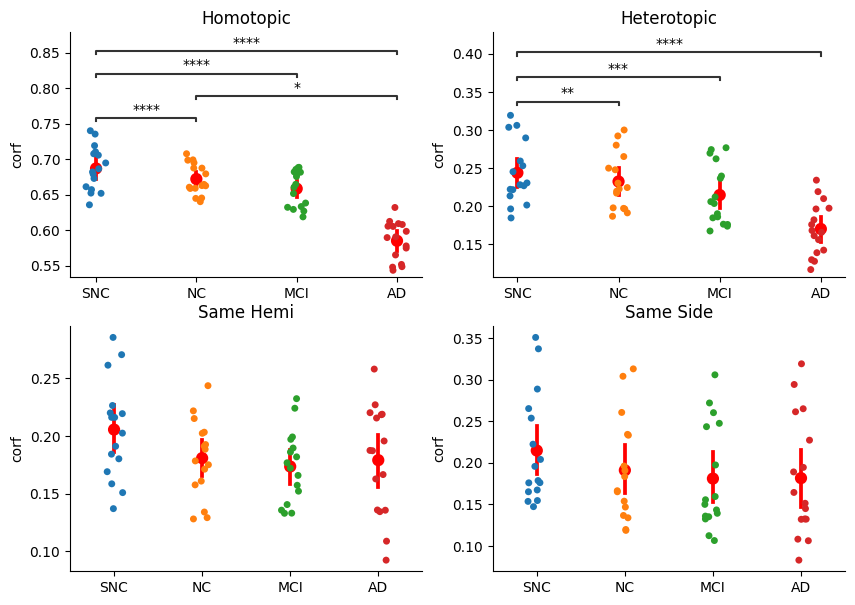

In [19]:
mc_group_homo = pd.read_excel("/Users/yilewang/workspaces/data4project/lateralization/gc1sec_res/meta/mc_group_homo.xlsx")
mc_group_hetero = pd.read_excel("/Users/yilewang/workspaces/data4project/lateralization/gc1sec_res/meta/mc_group_hetero.xlsx")
mc_group_same_hemi = pd.read_excel("/Users/yilewang/workspaces/data4project/lateralization/gc1sec_res/meta/mc_group_same_hemi.xlsx")
mc_group_same_side = pd.read_excel("/Users/yilewang/workspaces/data4project/lateralization/gc1sec_res/meta/mc_group_same_side.xlsx")

def vplot(x,y,data,ax, title=None):
    sns.stripplot(x=x,y=y,data=data, order=group, ax=ax)
    sns.pointplot(x=x,y=y,data=data, color='red', linestyles="", order=group, ax=ax)
    ax.set_title(title)
    annot = Annotator(ax, [
                    (("SNC"), ("NC")),(("SNC"), ("MCI")), (("SNC"), ("AD")), (("NC"), ("MCI")),(("NC"),("AD")), (("MCI"),("AD"))],
                    x=x,
                    y=y,
                    data = data)
    annot.configure(test='Mann-Whitney', text_format='star', hide_non_significant=True, comparisons_correction='BH')
    annot.apply_and_annotate()
    sns.despine(top=True, right=True)
    ax.set_ylabel('corf')
    ax.set_xlabel('')


figure = plt.figure(figsize=(10,7))
ax1= figure.add_subplot(221)
vplot('group','values',mc_group_homo,ax1, title='Homotopic')
ax2 = figure.add_subplot(222)
vplot('group','values',mc_group_hetero,ax2, title='Heterotopic')
ax3= figure.add_subplot(223)
vplot('group','values',mc_group_same_hemi,ax3, title='Same Hemi')
ax4 = figure.add_subplot(224)
vplot('group','values',mc_group_same_side,ax4, title='Same Side')
plt.show()





# mc_group['average'] = mc_group.iloc[:, 2:].mean(axis=1)
# mc_group['zone1_average'] = mc_group.iloc[:,2:5].mean(axis=1)
# mc_group['zone2_average'] = mc_group.iloc[:,5:].mean(axis=1)

# figure = plt.figure(figsize=(15,10))
# for ind, key in enumerate(mc_group.columns[2:]):
#     ax = figure.add_subplot(2,9,ind+1)
#     ax.set_title(key)
#     # sns.violinplot(x="group", y="average", data=mc_group, cut=0)
#     sns.stripplot(x="group", y=key,data=mc_group, palette=colors, label=None, alpha=0.7, ax=ax, zorder=0)
#     sns.pointplot(x="group", y=key,data=mc_group, markers="o", color="red", errorbar=None, linestyles="None",ax=ax, zorder=10)
#     annot = Annotator(ax, [
#                 (("SNC"), ("NC")),(("SNC"), ("MCI")), (("SNC"), ("AD")), (("NC"), ("MCI")),(("NC"),("AD")), (("MCI"),("AD"))],
#                 x="group",
#                 y=key,
#                 data = mc_group)
#     annot.configure(test='Mann-Whitney', text_format='star', hide_non_significant=True, comparisons_correction='BH')
#     annot.apply_and_annotate()
#     sns.despine(top=True, right=True)
#     ax.set_xlabel('')
#     ax.set_ylabel('')
# plt.show()

### Indvidualized MC Homo results

In [10]:
"""
@Author: Yile Wang

This script is used to calculate the homotopic meta-connectivity in four groups, SNC, NC, MCI, AD
"""

# brain region labels for your reference
regions = ['aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R']
regionswithgroups = ['groups','aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R']
group = ['SNC', 'NC', 'MCI','AD']
regionsHalf = np.array(['aCNG', 'mCNG','pCNG','HIP','PHG','AMY','sTEMp', 'mTEMp'])
zone1 = ['aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R']
zone2 = ['HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R']

regions14 = []
for i in range(14):
    wt = ["regions_", str(i)]
    wt = "".join(wt)
    regions14.append(wt)

# iterate simulated functional connectivity
if __name__ == "__main__":
    Trimer_Homo = pd.DataFrame(columns=['groups','trimer_homo','aCNG','mCNG','pCNG','HIP','PHG','AMY','sTEMp','mTEMp' ])
    Trimer_Hetero  = pd.DataFrame(columns=['groups','trimer_hetero','aCNG','mCNG','pCNG','HIP','PHG','AMY','sTEMp','mTEMp' ])
    Trimer = pd.DataFrame()
    tmp_col = ["group", "caseid"]
    tmp_col.extend(regionsHalf)
    for grp in group:
        # subject case ids
        ldir = os.listdir("/Users/yilewang/workspaces/data4project/lateralization/ts_fmri/fmri_AAL_16/"+ grp+'-TS')
        # ldir = os.listdir('/home/wayne/TS-4-Vik/'+grp+'-TS/')
        tmp_homo = np.array([])
        homoRegions = np.ones((1,len(regionsHalf)))
        for ind, y in enumerate(ldir):
            # import empirical functional connectivity
            # Here is the path of the mat file of the FC data
            pth_efc = "/Users/yilewang/workspaces/data4project/lateralization/ts_fmri/fmri_AAL_16/"+ grp+'-TS/'+ y +"/ROISignals_"+ y +".mat"
            # pth_efc = "/home/wayne/TS-4-Vik/"+grp+"-TS/"+ y +"/ROISignals_"+ y +".mat"
            ea = scipy.io.loadmat(pth_efc)
            all = ea['ROISignals']
            df = pd.DataFrame.from_dict(all)
            df.columns = regions
            # calculate the meta-connectivity, using existing script:
            dFCstream = TS2dFCstream(df.to_numpy(), 5, None, '2D') # dFCstream represents 
            # Calculate MC
            MC_MC = dFCstream2MC(dFCstream)
            # Calculate Trimers results, with nxnxn information
            MC_case = dFCstream2Trimers(dFCstream)
            region_homo_value = [grp, y]
            for i in range(0,15,2):
                ij_list = []
                j = i+1
                new_list = list(range(16))
                del new_list[i:j+1]
                # iterate the homo connectivity values
                for ai in new_list:
                    homo_value = MC_case[i,j,ai]
                    ij_list.append(homo_value)
                mean_value = np.mean(ij_list)
                region_homo_value.append(mean_value)
            single_homo = pd.DataFrame([region_homo_value], columns= tmp_col)
            Trimer = pd.concat([Trimer, single_homo], axis = 0, ignore_index=True)
    # Trimer.to_excel("/home/yat-lok/workspace/data4project/lateralization/gc1sec_res/meta/individualized_trimer.xlsx")

        # MC_homo = np.mean(MC_all, 3)
        # MC_single_groups = np.zeros((14, 8))
        # # only pick up L sides of the regions
        # for idnx, i in enumerate(range(0,15,2)):
        #     j = i+1 # represent R side
        #     newList = list(range(16))
        #     del newList[i:j+1] # drop the target regions L and R
        #     for idx, restNode in enumerate(newList):
        #         MC_single_groups[idx,idnx] = MC_homo[i,j,restNode] # In rest of the 14 regions, iternate the third dimensions, and pick up the homotopic MC
        # MC_single = pd.DataFrame(MC_single_groups, index=regions14, columns=regionsHalf)
        # grpInfo = [grp] * 14
        # MC_single.insert(0, "group", grpInfo)
        # Trimer = Trimer.append(MC_single)
    # Trimer.to_excel("/mnt/c/Users/Wayne/tvb/gc1sec_res/mc_homo.xlsx")

/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: inv

### specify four conditions
- 1 homotopic
- 2 heterotopic
- 3 different hemisphere but in one side
- 4 same hemisphere, and same side

In [11]:
"""
@Author: Yile Wang

This script is used to calculate the homotopic meta-connectivity in four groups, SNC, NC, MCI, AD
"""

# brain region labels for your reference
regions = ['aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R']
regionswithgroups = ['groups','aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R']
group = ['SNC', 'NC', 'MCI','AD']
regionsHalf = np.array(['aCNG', 'mCNG','pCNG','HIP','PHG','AMY','sTEMp', 'mTEMp'])
zone1 = ['aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R']
zone2 = ['HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R']

regions14 = []
for i in range(14):
    wt = ["regions_", str(i)]
    wt = "".join(wt)
    regions14.append(wt)

# iterate simulated functional connectivity
if __name__ == "__main__":
    Trimer_Homo = pd.DataFrame(columns=['groups','trimer_homo','aCNG','mCNG','pCNG','HIP','PHG','AMY','sTEMp','mTEMp' ])
    Trimer_Hetero  = pd.DataFrame(columns=['groups','trimer_hetero','aCNG','mCNG','pCNG','HIP','PHG','AMY','sTEMp','mTEMp' ])
    Trimer = pd.DataFrame()
    tmp_col = ["group", "caseid"]
    tmp_col.extend(regionsHalf)
    tmp_cols = ["group", "caseid"] + regions
    for grp in group:
        # subject case ids
        ldir = os.listdir("/Users/yilewang/workspaces/data4project/lateralization/ts_fmri/fmri_AAL_16/"+ grp+'-TS')
        # ldir = os.listdir('/home/wayne/TS-4-Vik/'+grp+'-TS/')
        # condition1
        tmp_homo = np.array([])
        homoRegions = np.ones((1,len(regionsHalf)))
        # condition2
        tmp_hetero = np.array([])
        heteroRegions = np.ones((1, len(regions)))

        for ind, y in enumerate(ldir):
            # import empirical functional connectivity
            # Here is the path of the mat file of the FC data
            pth_efc = "/Users/yilewang/workspaces/data4project/lateralization/ts_fmri/fmri_AAL_16/"+ grp+'-TS/'+ y +"/ROISignals_"+ y +".mat"
            # pth_efc = "/home/wayne/TS-4-Vik/"+grp+"-TS/"+ y +"/ROISignals_"+ y +".mat"
            ea = scipy.io.loadmat(pth_efc)
            all = ea['ROISignals']
            df = pd.DataFrame.from_dict(all)
            df.columns = regions
            # calculate the meta-connectivity, using existing script:
            dFCstream = TS2dFCstream(df.to_numpy(), 5, None, '2D') # dFCstream represents 
            # Calculate MC
            MC_MC = dFCstream2MC(dFCstream)
            # Calculate Trimers results, with nxnxn information
            MC_case = dFCstream2Trimers(dFCstream)
            # conditions:
            region_homo_value = [grp, y]
            region_hetero_value = [grp, y]
            region_same_hemi_value= [grp,y]
            region_same_side_value = [grp, y]
            # condition 1, homotopic, done
            for root in range(16): 
                root_list = []
               # create lists to work 
                targets_list = [num for num in range(16) if num != root]
                target1_list = [num for num in targets_list if num%2 == root%2]
                for target1 in target1_list:
                    if root%2==0:
                        homo_value = MC_case[target1, target1+1, root]
                    else:
                        homo_value = MC_case[target1, target1-1, root]
                    root_list.append(homo_value)
                mean_homo = np.mean(root_list)
                region_homo_value.append(mean_homo)
            _single = pd.DataFrame([region_homo_value], columns= tmp_cols)
            Trimer = pd.concat([Trimer, _single], axis = 0, ignore_index=True) 
    Trimer.to_excel('/Users/yilewang/workspaces/data4project/lateralization/gc1sec_res/meta/individualized_homo2.xlsx')
            
            # for i in range(0,15,2):
            #     ij_list = []
            #     j = i+1
            #     new_list = list(range(16))
            #     del new_list[i:j+1]
            #     # iterate the homo connectivity values
            #     for ai in new_list:
            #         homo_value = MC_case[i,j,ai]
            #         ij_list.append(homo_value)
            #     mean_value = np.mean(ij_list)
            #     region_homo_value.append(mean_value)

            # condition 2, heterotipic
    #         for root in range(16):
    #             root_list = []
    #             # create lists to work 
    #             targets_list = [num for num in range(16) if num != root]
    #             target1_list = [num for num in targets_list if num%2 == root%2]
    #             target2_list = [num for num in targets_list if num not in target1_list]
    #             # iterative process
    #             for target1 in target1_list:
    #                 for target2 in target2_list:
    #                     hetero_value = MC_case[target1, target2, root]
    #                     root_list.append(hetero_value)
    #             mean_hetero = np.mean(root_list)
    #             region_hetero_value.append(mean_hetero)
    #         _single = pd.DataFrame([region_hetero_value], columns= tmp_cols)
    #         Trimer = pd.concat([Trimer, _single], axis = 0, ignore_index=True) 
    # Trimer.to_excel('/Users/yilewang/workspaces/data4project/lateralization/gc1sec_res/meta/individualized_hetero.xlsx')

            # condition 3, diff hemi, same side
    #         for root in range(16):
    #             root_list = []
    #             # create lists to work 
    #             targets_list = [num for num in range(16) if num != root]
    #             target1_list = [num for num in targets_list if num%2 != root%2]
    #             for target1 in target1_list:
    #                 target2_list = [num for num in target1_list if num != target1]
    #                 for target2 in target2_list:
    #                     same_hemi_value = MC_case[target1, target2, root]
    #                     root_list.append(same_hemi_value)
    #             mean_same_hemi = np.mean(root_list)
    #             region_same_hemi_value.append(mean_same_hemi)
    #         _single = pd.DataFrame([region_same_hemi_value], columns= tmp_cols)
    #         Trimer = pd.concat([Trimer, _single], axis = 0, ignore_index=True)
    # Trimer.to_excel('/Users/yilewang/workspaces/data4project/lateralization/gc1sec_res/meta/individualized_same_hemi.xlsx', index=False)
                

            # condition 4, same hemi, same side
    #         for root in range(16):
    #             root_list = []
    #             # create lists to work 
    #             targets_list = [num for num in range(16) if num != root]
    #             target1_list = [num for num in targets_list if num%2 == root%2]
    #             for target1 in target1_list:
    #                 target2_list = [num for num in target1_list if num != target1]
    #                 for target2 in target2_list:
    #                     same_side_value = MC_case[target1, target2, root]
    #                     root_list.append(same_side_value)
    #             mean_same_side = np.mean(root_list)
    #             region_same_side_value.append(mean_same_side)
    #         _single = pd.DataFrame([region_same_side_value], columns= tmp_cols)
    #         Trimer = pd.concat([Trimer, _single], axis = 0, ignore_index=True)
    # Trimer.to_excel('/Users/yilewang/workspaces/data4project/lateralization/gc1sec_res/meta/individualized_same_side.xlsx', index=False)




            # single_ = pd.DataFrame([region_homo_value], columns= tmp_col)
            # Trimer = pd.concat([Trimer, single_homo], axis = 0, ignore_index=True)

/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: inv

/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data p

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04



/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data p

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04



/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data p

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

SNC vs. MCI: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.156e-02 U_stat=2.680e+02
SNC vs. AD: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.430e-02 U_stat=1.050

/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data p

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04



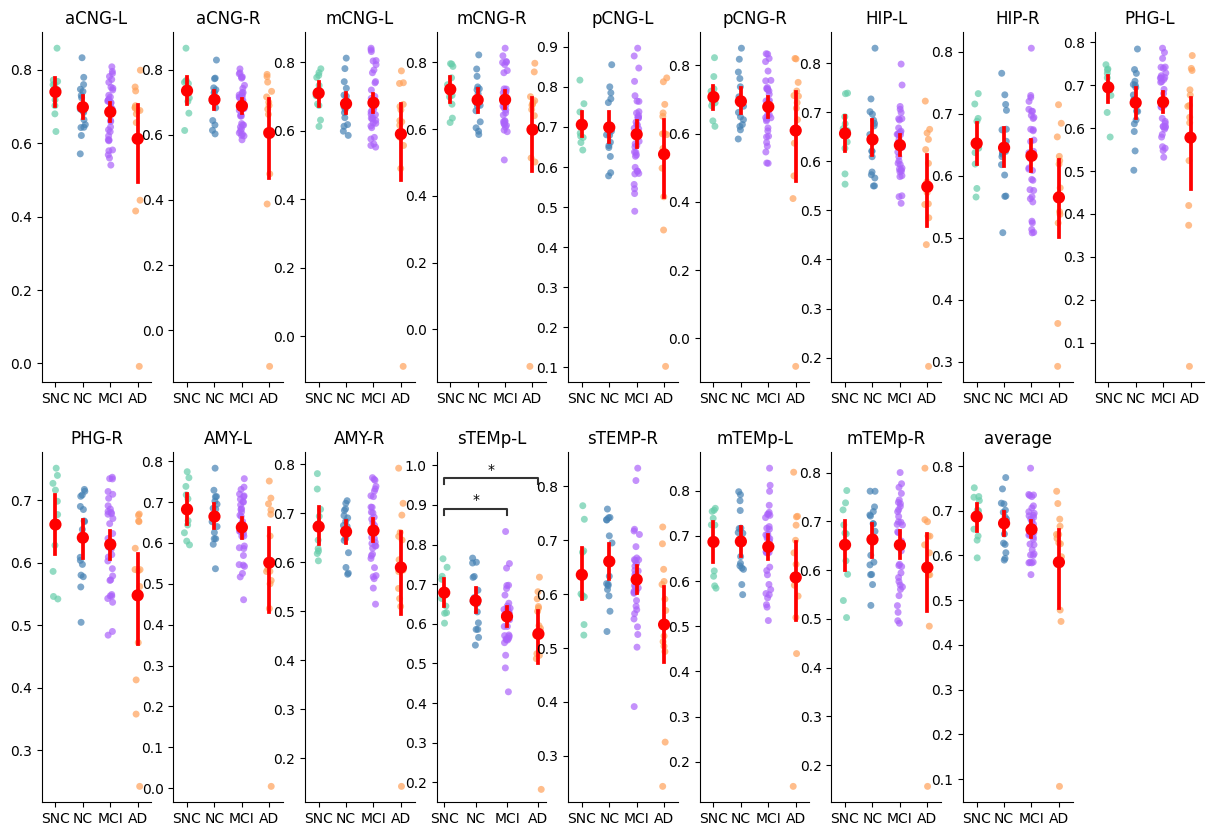

In [13]:
# individual trimer
mc_group = pd.read_excel("/Users/yilewang/workspaces/data4project/lateralization/gc1sec_res/meta/individualized_homo2.xlsx")

mc_group['average'] = mc_group.iloc[:, 2:].mean(axis=1)
# mc_individual['zone1_average'] = mc_individual.iloc[:,2:5].mean(axis=1)
# mc_individual['zone2_average'] = mc_individual.iloc[:,5:].mean(axis=1)

figure = plt.figure(figsize=(15,10))
for ind, key in enumerate(mc_group.columns[2:]):
    ax = figure.add_subplot(2,9,ind+1)
    ax.set_title(key)
    # sns.violinplot(x="group", y="average", data=mc_individual, cut=0)
    sns.stripplot(x="group", y=key,data=mc_group, palette=colors, label=None, alpha=0.7, ax=ax, zorder=0)
    sns.pointplot(x="group", y=key,data=mc_group, markers="o", color="red", errorbar=None, linestyles="None",ax=ax, zorder=10)
    annot = Annotator(ax, [
                (("SNC"), ("NC")),(("SNC"), ("MCI")), (("SNC"), ("AD")), (("NC"), ("MCI")),(("NC"),("AD")), (("MCI"),("AD"))],
                x="group",
                y=key,
                data = mc_group)
    annot.configure(test='Mann-Whitney', text_format='star', hide_non_significant=True, comparisons_correction='BH')
    annot.apply_and_annotate()
    sns.despine(top=True, right=True)
    ax.set_xlabel('')
    ax.set_ylabel('')
plt.show()

Index(['aCNG-L', 'aCNG-R'], dtype='object')
Index(['mCNG-L', 'mCNG-R'], dtype='object')
Index(['pCNG-L', 'pCNG-R'], dtype='object')
Index(['HIP-L', 'HIP-R'], dtype='object')
Index(['PHG-L', 'PHG-R'], dtype='object')
Index(['AMY-L', 'AMY-R'], dtype='object')
Index(['sTEMp-L', 'sTEMP-R'], dtype='object')
Index(['mTEMp-L', 'mTEMp-R'], dtype='object')
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.

/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data p

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

NC vs. AD: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.031e-02 U_stat=1.630e+02
SNC vs. AD: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.202e-02 U_stat=1.060e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04



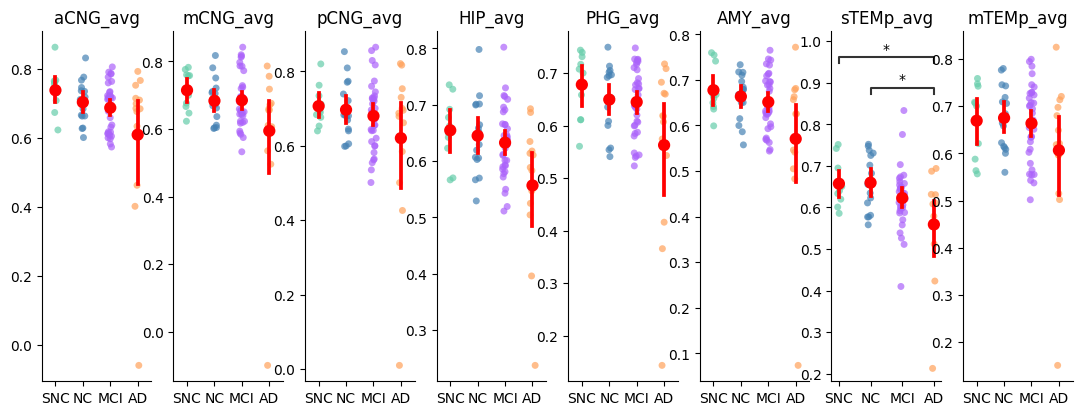

In [17]:
# individual trimer
mc_group = pd.read_excel("/Users/yilewang/workspaces/data4project/lateralization/gc1sec_res/meta/individualized_homo2.xlsx")

mc_group['average'] = mc_group.iloc[:, 2:].mean(axis=1)
# mc_individual['zone1_average'] = mc_individual.iloc[:,2:5].mean(axis=1)
# mc_individual['zone2_average'] = mc_individual.iloc[:,5:].mean(axis=1)


for indx in range(0,16,2):
    # mc_individual[f"{key[:-2]}_diff"] = np.abs(mc_individual.iloc[:,ind+2] - mc_individual.iloc[:,ind+3]) / (mc_individual.iloc[:,ind+2] + mc_individual.iloc[:,ind+3])
    print(mc_group.columns[indx+2:indx+4])
    mc_group[f"{mc_group.columns[indx+2][:-2]}_avg"] = np.mean(mc_group.iloc[:,indx+2:indx+4], axis=1)



figure = plt.figure(figsize=(15,10))
for ind, key in enumerate(mc_group.columns[19:]):
    ax = figure.add_subplot(2,9,ind+1)
    ax.set_title(key)
    # sns.violinplot(x="group", y="average", data=mc_individual, cut=0)
    sns.stripplot(x="group", y=key,data=mc_group, palette=colors, label=None, alpha=0.7, ax=ax, zorder=0)
    sns.pointplot(x="group", y=key,data=mc_group, markers="o", color="red", errorbar=None, linestyles="None",ax=ax, zorder=10)
    annot = Annotator(ax, [
                (("SNC"), ("NC")),(("SNC"), ("MCI")), (("SNC"), ("AD")), (("NC"), ("MCI")),(("NC"),("AD")), (("MCI"),("AD"))],
                x="group",
                y=key,
                data = mc_group)
    annot.configure(test='Mann-Whitney', text_format='star', hide_non_significant=True, comparisons_correction='BH')
    annot.apply_and_annotate()
    sns.despine(top=True, right=True)
    ax.set_xlabel('')
    ax.set_ylabel('')
plt.show()

Index(['aCNG-L', 'aCNG-R'], dtype='object')
Index(['mCNG-L', 'mCNG-R'], dtype='object')
Index(['pCNG-L', 'pCNG-R'], dtype='object')
Index(['HIP-L', 'HIP-R'], dtype='object')
Index(['PHG-L', 'PHG-R'], dtype='object')
Index(['AMY-L', 'AMY-R'], dtype='object')
Index(['sTEMp-L', 'sTEMP-R'], dtype='object')
Index(['mTEMp-L', 'mTEMp-R'], dtype='object')
Index(['aCNG-L', 'aCNG-R'], dtype='object')
Index(['mCNG-L', 'mCNG-R'], dtype='object')
Index(['pCNG-L', 'pCNG-R'], dtype='object')
Index(['HIP-L', 'HIP-R'], dtype='object')
Index(['PHG-L', 'PHG-R'], dtype='object')
Index(['AMY-L', 'AMY-R'], dtype='object')
Index(['sTEMp-L', 'sTEMP-R'], dtype='object')
Index(['mTEMp-L', 'mTEMp-R'], dtype='object')
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1

/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data p

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04



/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data p

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04



/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data p

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

NC_Heterotopic vs. MCI_Heterotopic: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.343e-03 U_stat=4.210e+02
NC_Homotopic vs. AD_Homotopic: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.031e-02 U_stat=1.630e+02
SNC_Homotopic vs. AD_Homotopic: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.202e-02 U_stat=1.060e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04



/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


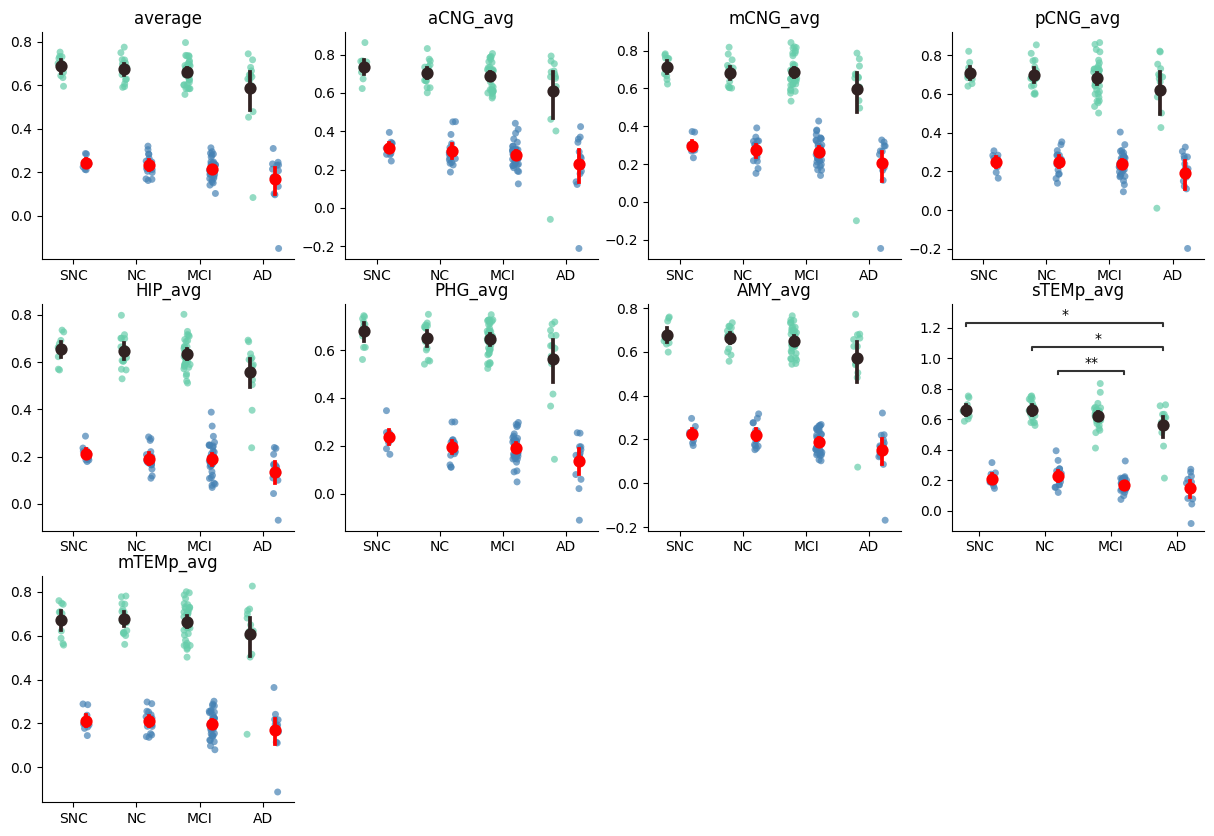

In [18]:
# individual trimer
mc_individual_homo = pd.read_excel("/Users/yilewang/workspaces/data4project/lateralization/gc1sec_res/meta/individualized_homo2.xlsx")
mc_individual_hetero = pd.read_excel("/Users/yilewang/workspaces/data4project/lateralization/gc1sec_res/meta/individualized_hetero.xlsx")
mc_individual_homo['average'] = mc_individual_homo.iloc[:, 2:].mean(axis=1)
mc_individual_hetero['average'] = mc_individual_hetero.iloc[:,2:].mean(axis=1)


for ind in range(0,16,2):
    # mc_individual[f"{key[:-2]}_diff"] = np.abs(mc_individual.iloc[:,ind+2] - mc_individual.iloc[:,ind+3]) / (mc_individual.iloc[:,ind+2] + mc_individual.iloc[:,ind+3])
    print(mc_individual_homo.columns[ind+2:ind+4])
    mc_individual_homo[f"{mc_individual_homo.columns[ind+2][:-2]}_avg"] = np.mean(mc_individual_homo.iloc[:,ind+2:ind+4], axis=1)    



for ind in range(0,16,2):
    # mc_individual[f"{key[:-2]}_diff"] = np.abs(mc_individual.iloc[:,ind+2] - mc_individual.iloc[:,ind+3]) / (mc_individual.iloc[:,ind+2] + mc_individual.iloc[:,ind+3])
    print(mc_individual_hetero.columns[ind+2:ind+4])
    mc_individual_hetero[f"{mc_individual_hetero.columns[ind+2][:-2]}_avg"] = np.mean(mc_individual_hetero.iloc[:,ind+2:ind+4], axis=1)    

# mc_individual['zone1_average'] = mc_individual.iloc[:,2:5].mean(axis=1)
# mc_individual['zone2_average'] = mc_individual.iloc[:,5:].mean(axis=1)

labels = ['Homotopic']*74 + ['Heterotopic']*74
gr = pd.concat([mc_individual_homo.group, mc_individual_hetero.group], axis = 0)

annot.reset_configuration()
figure = plt.figure(figsize=(15,10))
for ind, key in enumerate(mc_individual_homo.columns[18:]):
    values = pd.concat([mc_individual_homo[key], mc_individual_hetero[key]], axis=0)
    ax = figure.add_subplot(3,4,ind+1)
    ax.set_title(key)
    # sns.violinplot(x="group", y="average", data=mc_individual, cut=0)
    sns.stripplot(x=gr, y=values, hue=labels, dodge=0.5, palette=colors, label=None, alpha=0.7, ax=ax, zorder=0)
    sns.pointplot(x=gr, y=values,hue=labels, dodge=0.4, markers="o", color="red", errorbar=None, linestyles="None",ax=ax, zorder=10)
    annot = Annotator(ax, [
            (("SNC", "Homotopic"), ("NC", "Homotopic")),(("SNC", "Homotopic"), ("MCI", "Homotopic")), (("SNC","Homotopic"), ("AD", "Homotopic")), (("NC", "Homotopic"), ("MCI", "Homotopic")),(("NC", "Homotopic"),("AD", "Homotopic")), (("MCI", "Homotopic"),("AD", "Homotopic")),
                        (("SNC", "Heterotopic"), ("NC", "Heterotopic")),(("SNC", "Heterotopic"), ("MCI", "Heterotopic")), (("SNC","Heterotopic"), ("AD", "Heterotopic")), (("NC", "Heterotopic"), ("MCI", "Heterotopic")),(("NC", "Heterotopic"),("AD", "Heterotopic")), (("MCI", "Heterotopic"),("AD", "Heterotopic"))],         
                x=gr,
                y=values,
                hue = labels)
    annot.configure(test='Mann-Whitney', hide_non_significant=True, comparisons_correction='BH')
    annot.apply_and_annotate()
    sns.despine(top=True, right=True)
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.legend([],[], frameon=False)
plt.show()